In [1]:
using Plots

In [2]:
using DifferentialEquations

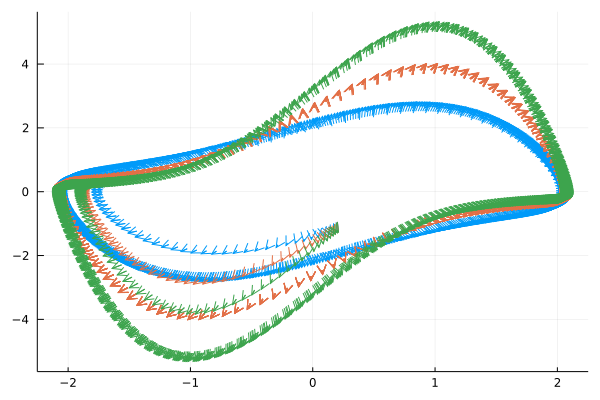

In [11]:
function main(mu)
    function vdp_sun(du, u, p, t)
        # dx/dt
        du[1] = u[2]
        # dy/dt
        du[2] = mu * (1.0 - u[1]^2.0) * u[2] - u[1]
        du
    end
    u0=[0.2; -1.2]
    tspan=(0.0, 50.0)
    prob = ODEProblem(vdp_sun,u0,tspan)
    sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

    u1 = []
    u2 = []
    for i in sol.u
        push!(u1, i[1])
        push!(u2, i[2])
    end
    #k=0.1
    #quiver(u1, u2, quiver=(k*u1, k*u2))
    return u1, u2
end

k=0.05
u1, u2 = main(1)
quiver(u1, u2, quiver=(k*u1, k*u2))

u1, u2 = main(2)
quiver!(u1, u2, quiver=(k*u1, k*u2))

u1, u2 = main(3)
quiver!(u1, u2, quiver=(k*u1, k*u2))

#k=0.1
#for i = 2:4
    #u1, u2 = main(i)
    #X, Y = meshgrid(u1,u2)
    #quiver!(u1, u2, quiver=(k*u1, k*u2))
#end